## Initialising a COMB distribution
 To initialse a Conway-Maxwell-Binomial distribution use the following lines of code
 ```python
 import ConwayMaxwellBinomial as cmb
 p = 0.4
 nu = 0.9
 m = 100
 com_distn = cmb.ConwayMaxwellBinomial(p, nu, m)
 ```
 To sample from the distribution run
 ```python
 com_distn.rvs(size=10)
 ```
 and to evaluate the probability mass function for some outcome, run
 ```python
 com_distn.pmf(99)
 com_distn.pmf(40)
 ```

## Estimating the parameters of the distribution
 To estmiate the parameters of the Conway Maxwell Binomial distribution given a sample, run the following lines
 ```python
 sample = com_distn.rvs(size=15)
 initial_params = [0.5, 1]
 cmb.estimateParams(m, sample, initial_params)
 ```
 To evaluate the negative log-likelihood of a sample, run
 ```python
 cmb.conwayMaxwellNegLogLike([p, nu], m, sample)
 ```

$\nu$: governs shape / dependence structure
- $\nu = 1$ → standard Binomial (independent trials).
- $\nu > 1$ → under-dispersion, distribution squeezed toward the middle.
Intuitively, outcomes are “repelling” each other, so you often see balanced counts (half successes, half failures).
- $\nu < 1$ → over-dispersion, heavier tails.
Outcomes are “clumping” together, so you often see all-or-nothing. This is what you called positive association between trials.

So yes: $\nu$ governs the “shape” — how much mass lies in the middle versus the extremes.

-----

$p$: governs location / tilt
- $p < 0.5$ → tilt toward the 0 end (more failures).
- $p > 0.5$ → tilt toward the n end (more successes).
- $p = 0.5$ → symmetric distribution (but still shaped by ν).

So p doesn’t equal the per-trial success rate (except at m=1), but it does tilt the distribution left vs right.

-----

Putting them together
- $\nu$: sets the shape:
	- $\nu > 1$ → narrow, concentrated near the middle
	- $\nu = 1$ → ordinary binomial spread
	- $\nu < 1$ → broad, heavy tails, all-or-nothing tendency
- $p$: sets the direction of tilt:
	- $p < 0.5$ → extremes on the “all negative” side dominate
	- $p > 0.5$ → extremes on the “all positive” side dominate

-----

Simply fast intuition:
- $\nu$ governs the shape (spread vs clumping).
- $p$ informs the translation / tilt (whether the mass is drawn left or right).


In [ ]:
import sys
module_path_lib = r"../lib"
sys.oath.append(module_path_lib)

import CMBD.ConwayMaxwellBinomial as cmb
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Initialising a COMB distribution

In [2]:
# To initialse a Conway-Maxwell-Binomial distribution use the following lines of code
p = 0.4
nu = 0.9
m = 100
com_distn = cmb.ConwayMaxwellBinomial(p, nu, m)

In [3]:
# To sample from the distribution run
com_distn.rvs(size=10)

array([36, 34, 47, 41, 46, 38, 29, 36, 46, 39])

In [4]:
# and to evaluate the probability mass function for some outcome, run
com_distn.pmf(50)
# com_distn.pmf(40)

np.float64(0.007867217182264118)

## Estimating the parameters of the distribution

In [5]:
# To estmiate the parameters of the Conway Maxwell Binomial distribution given a sample, run the following lines
sample = com_distn.rvs(size=20000)
initial_params = [0.5, 1]
cmb.estimateParams(m, sample, initial_params)

array([0.40042439, 0.89497666])

In [6]:
# To evaluate the negative log-likelihood of a sample, run
cmb.conwayMaxwellNegLogLike([p, nu], m, sample)

np.float64(61156.89409372583)

# Toy Examples 

In [55]:
import numpy as np

def oned_mcmc(positive_percentage, transition_matrix, n_samples):
    # normalize transition matrix
    tm = np.array(transition_matrix)
    tm = tm / tm.sum(axis=1, keepdims=True)

    # initial distribution (night 1)
    n_pos = round(positive_percentage * n_samples)
    n_neg = n_samples - n_pos
    night1 = np.array([n_neg, n_pos])

    # expected distribution after one transition (night 2)
    night2 = night1 * tm

    output = {
        '0': round(night2[0, 0]),
        '1': round(night2[0, 1] + night2[1, 0]),
        '2': round(night2[1, 1])
    }

    # print(night2, output)
    print(output)

# example call
oned_mcmc(0.636, [[12, 4.5], [4.5, 9]], 151)
oned_mcmc(0.589, [[14, 5.5], [5.5, 5]], 151)

{'0': 40, '1': 45, '2': 64}
{'0': 45, '1': 58, '2': 42}


In [63]:
print(f"\n{'-'*10}Toy examples{'-'*10}\n")
for label, sample in {
    "nt1_toy1":       [0]*7    + [1]*(14)   + [2]*7,
    "nt1_toy2":       [0]*14   + [1]*(7)    + [2]*14,
    "nt1_toy3":       [0]*14   + [1]*(7)    + [2]*7,
    "nt1_toy4":       [0]*7    + [1]*(7)    + [2]*14,
    "nt1_toy5":       [0]*14   + [1]*(10)   + [2]*5,
    "nt1_toy6":       [0]*5   + [1]*(10)   + [2]*14,

}.items():
    x = np.asarray(sample)
    m = 2
    
    est = cmb.estimateParams(m, x)
    nll = cmb.conwayMaxwellNegLogLike(est, m, x)
    
    est = np.round(est, 3)
    print(f"{label}, {est=}, {nll=}")



----------Toy examples----------

nt1_toy1, est=array([0.5, 1. ]), nll=np.float64(29.112181583517703)
nt1_toy2, est=array([ 0.5, -1. ]), nll=np.float64(36.92220587951649)
nt1_toy3, est=array([ 0.414, -0.5  ]), nll=np.float64(29.112181583548516)
nt1_toy4, est=array([ 0.586, -0.5  ]), nll=np.float64(29.112181583547507)
nt1_toy5, est=array([0.374, 0.257]), nll=np.float64(29.631735962883276)
nt1_toy6, est=array([0.626, 0.257]), nll=np.float64(29.631735962883315)

----------Actual data----------



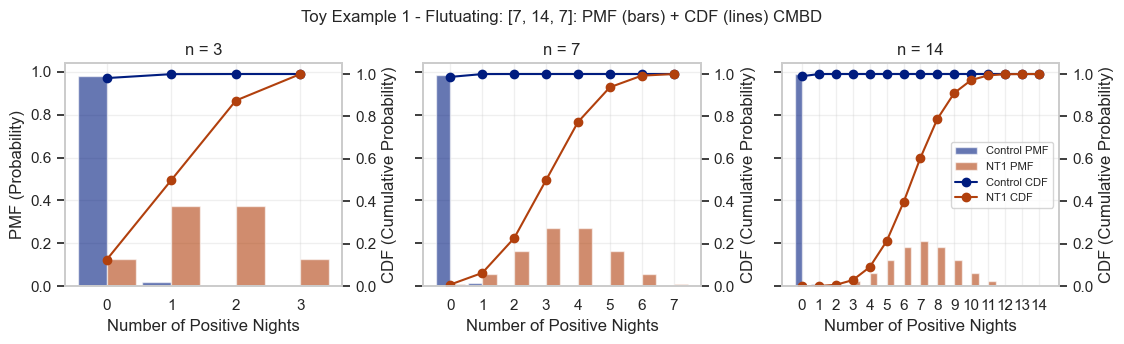

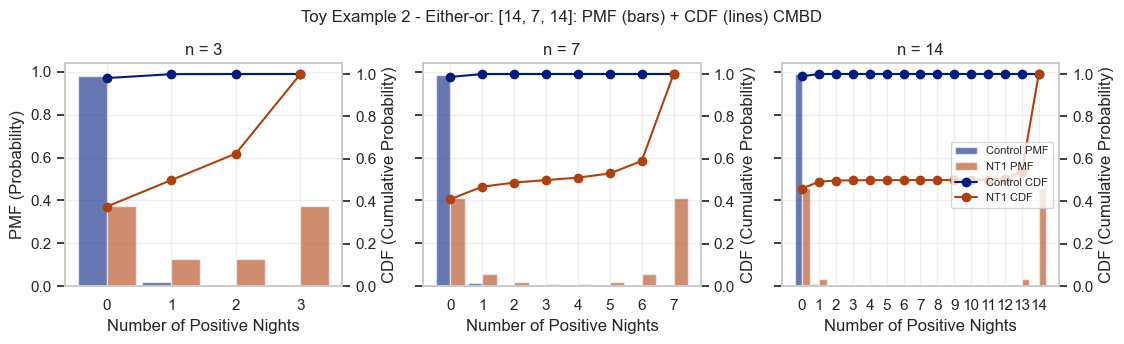

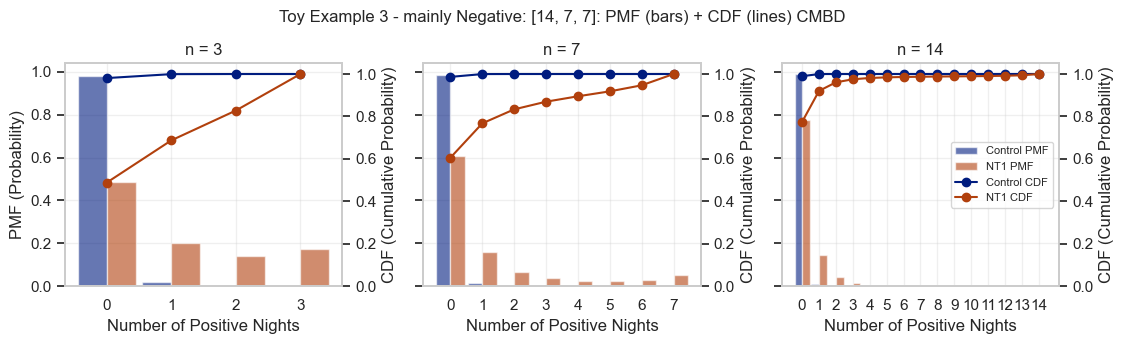

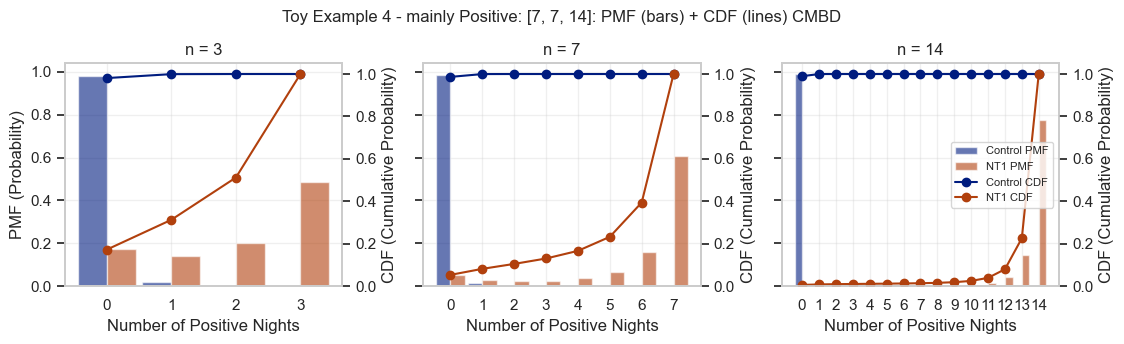

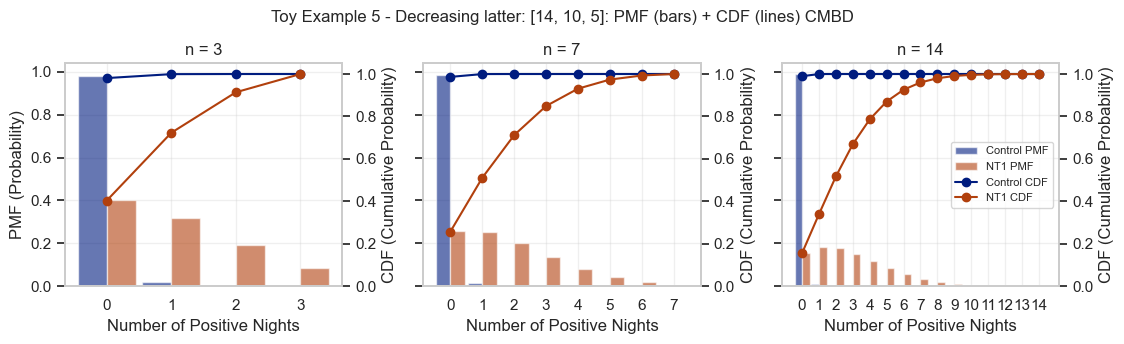

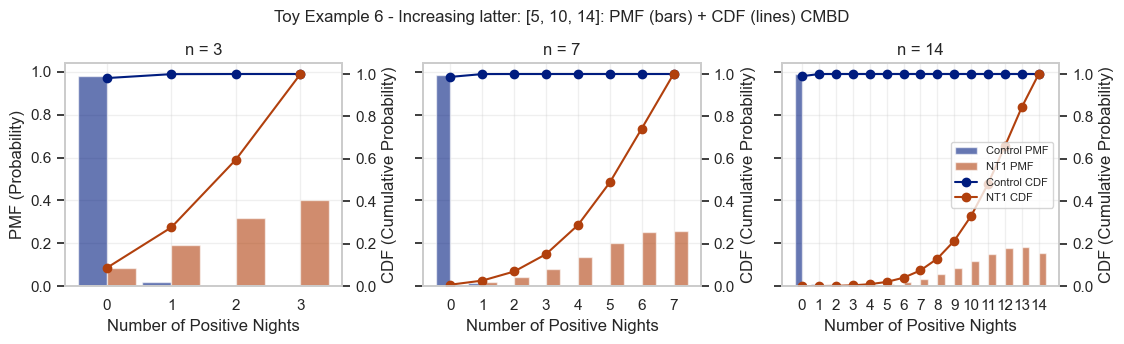

In [61]:

sns.set(style='whitegrid')

# -------------------- settings --------------------
# Choose which approaches to show and which n to compare:
n_values   = [3, 7, 14]  # change as you like

approaches = [
    {'name': "Toy Example 1 - Flutuating: [7, 14, 7]", "Control": (0.02856839, -0.40111661), "NT1": (0.5, 1)},
    {'name': "Toy Example 2 - Either-or: [14, 7, 14]", "Control": (0.02856839, -0.40111661), "NT1": (0.5,  -1)},
    {'name': "Toy Example 3 - mainly Negative: [14, 7, 7]", "Control": (0.02856839, -0.40111661), "NT1": (0.414, -0.5)},
    {'name': "Toy Example 4 - mainly Positive: [7, 7, 14]", "Control": (0.02856839, -0.40111661), "NT1": (0.586, -0.5)},
    {'name': "Toy Example 5 - Decreasing latter: [14, 10, 5]", "Control": (0.02856839, -0.40111661), "NT1": (0.374, 0.257)},
    {'name': "Toy Example 6 - Increasing latter: [5, 10, 14]", "Control": (0.02856839, -0.40111661), "NT1": (0.626, 0.257)},

]

def exact_pmf_cdf(dist, xs):
    """Return PMF and CDF arrays for the given COM-B distribution over xs."""
    pmf = np.array([dist.pmf(k) for k in xs], dtype=float)
    pmf = pmf / pmf.sum() # guard against tiny drift
    cdf = np.cumsum(pmf)
    return pmf, cdf

# Use a stable color palette for Control vs NT1
con_color, nt1_color = sns.color_palette("dark", 2)

for approach in approaches:

    # extract parameters
    name = approach['name']
    p_con, nu_con = approach["Control"]
    p_nt1,  nu_nt1  = approach["NT1"]

    # One figure per approach; columns = number of n values
    fig, axes = plt.subplots(1, len(n_values), figsize=(3.8*len(n_values), 3.6), sharey=True)
    if len(n_values) == 1:
        axes = [axes]  # make iterable if only one subplot

    for idx, n in enumerate(n_values):
        ax1 = axes[idx]
        x = np.arange(0, n+1)

        # Build COM-B distributions at m = n
        dist_con  = cmb.ConwayMaxwellBinomial(p_con,  nu_con,  n)
        dist_nt1  = cmb.ConwayMaxwellBinomial(p_nt1,  nu_nt1,  n)

        # Exact PMF/CDF
        pmf_con, cdf_con = exact_pmf_cdf(dist_con, x)
        pmf_nt1, cdf_nt1 = exact_pmf_cdf(dist_nt1, x)

        # ---- PMF as side-by-side bars (same left y-axis) ----
        width = 0.45
        ax1.bar(x - width/2, pmf_con, width=width, label='Control PMF', color=con_color, alpha=0.6)
        ax1.bar(x + width/2, pmf_nt1, width=width, label='NT1 PMF',     color=nt1_color, alpha=0.6)
        ax1.set_xlabel("Number of Positive Nights")
        if idx == 0:
            ax1.set_ylabel("PMF (Probability)")
        ax1.set_title(f"n = {n}")
        ax1.set_xticks(x)
        ax1.grid(True, alpha=0.3)

        # ---- CDF on a twin axis (right y-axis), lines with markers ----
        ax2 = ax1.twinx()
        line_con, = ax2.plot(x, cdf_con, color=con_color, linestyle='-', marker='o', label='Control CDF')
        line_nt1, = ax2.plot(x, cdf_nt1, color=nt1_color, linestyle='-', marker='o', label='NT1 CDF')
        ax2.set_ylabel("CDF (Cumulative Probability)")
        ax2.grid(False)
        ax2.set_ylim(0, 1.05)

        # Legend: only add once (on the last subplot)
        if idx == len(n_values) - 1:
            handles = [
                ax1.patches[0],  # one of the Control PMF bars
                ax1.patches[-1], # one of the NT1 PMF bars
                line_con,
                line_nt1
            ]
            labels = ['Control PMF', 'NT1 PMF', 'Control CDF', 'NT1 CDF']
            ax2.legend(handles, labels, loc='center right', fontsize=8)


    fig.suptitle(f"{name}: PMF (bars) + CDF (lines) CMBD", y=.95, fontsize=12)
    plt.tight_layout()
    plt.show()

Takehome: 
- Dispersion parameter < 0: Either or
- Dispersion parameter 0 < nu < 1: Positive correlation, creates bell shaped curve.
- Dispersion parameter 1 < nu: negative correlation. 

# Actual data

In [ ]:

print(f"\n{'-'*10}Actual data{'-'*10}\n")
datasets = [
    
    {'Dx': 'control', 'method': 'soremps', 'dataset': 'NSRR', 'nights': 2, 'outcomes': [0]*4580 + [1]*(148) + [2]*4},
    {'Dx': 'NT1', 'method': 'soremps', 'dataset': '994-1501, 861-2001', 'nights': 2, 'outcomes': [0]*14 + [1]*(11) + [2]*5},

    {'Dx': 'control', 'method': 'multi', 'dataset': 'NSRR', 'nights': 2, 'outcomes': [0]*4601 + [1]*(122) + [2]*9},
    {'Dx': 'NT1', 'method': 'multi', 'dataset': '994-1501, 861-2001', 'nights': 2, 'outcomes': [0]*12 + [1]*(9) + [2]*9},

    # TAK-861-2001 - 3 nights
    {'Dx': 'Control', 'method': 'multi', 'dataset': 'WSC', 'nights': 3, 'outcomes': [0]*620 + [1]*25 + [2]*3 + [3]*0},
    {'Dx': 'NT1', 'method': 'multi', 'dataset': '861-2001', 'nights': 3, 'outcomes': [0]*6 + [1]*6 + [2]*2 + [3]*4},

    # fabricated
    {'Dx': 'NT1', 'method': 'multi fab', 'dataset': '861-2001', 'nights': 3, 'outcomes': [0]*5 + [1]*6 + [2]*4 + [3]*3},

    # 1-D MCMC:
    {'Dx': 'NT1', 'method': '1d MCMC soremps', 'dataset': 'MSLT', 'nights': 2, 'outcomes': [0]*45 + [1]*58 + [2]*42},
    {'Dx': 'NT1', 'method': '1d MCMC multi', 'dataset': 'MSLT', 'nights': 2, 'outcomes': [0]*40 + [1]*45 + [2]*64},
    
    # MSLT
    {'Dx': 'NT1', 'method': 'MSLT', 'dataset': 'MSLT', 'nights': 2, 'outcomes': [0]*10 + [1]*20 + [2]*47},

]


for dataset in datasets:
    
    # extract parameters
    x = np.asarray(dataset.get('outcomes'))
    m = dataset.get('nights')
    
    est = cmb.estimateParams(m, x)
    nll = cmb.conwayMaxwellNegLogLike(est, m, x)
    
    est = np.round(est, 4)
    print(f"{dataset.get('Dx')}, {dataset.get('method')}, {dataset.get('dataset')}, {dataset.get('nights')}, {est=}, {nll=:.2f}")


----------Actual data----------

control, soremps, NSRR, 2, est=array([0.0287, 0.1289]), nll=690.64
NT1, soremps, 994-1501, 861-2001, 2, est=array([0.3741, 0.3948]), nll=30.67
control, multi, NSRR, 2, est=array([ 0.0424, -0.7381]), nll=631.84
NT1, multi, 994-1501, 861-2001, 2, est=array([ 0.4641, -0.2075]), nll=32.67
Control, multi, WSC, 3, est=array([ 0.0737, -0.5847]), nll=125.40
NT1, multi, 861-2001, 3, est=array([ 0.4476, -0.1636]), nll=24.32
NT1, multi fab, 861-2001, 3, est=array([0.4501, 0.239 ]), nll=24.45
NT1, 1d MCMC soremps, MSLT, 2, est=array([0.4914, 0.4159]), nll=157.84
NT1, 1d MCMC multi, MSLT, 2, est=array([ 0.5585, -0.1691]), nll=160.56
NT1, MSLT, MSLT, 2, est=array([ 0.6843, -0.1163]), nll=70.58


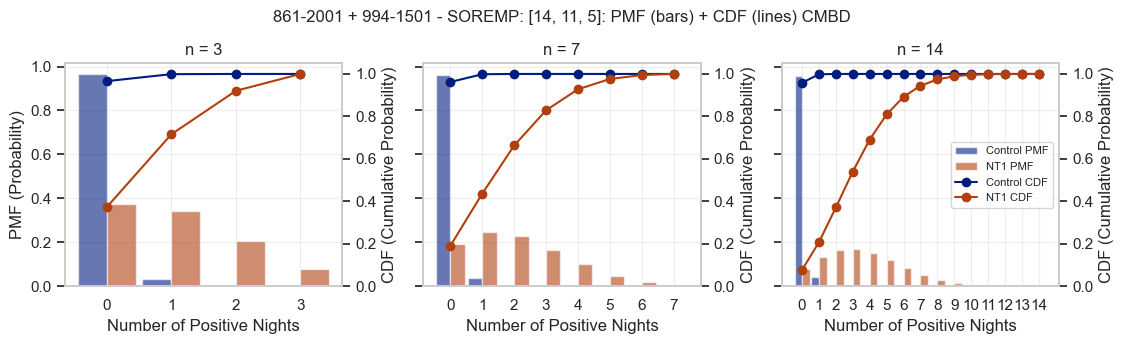

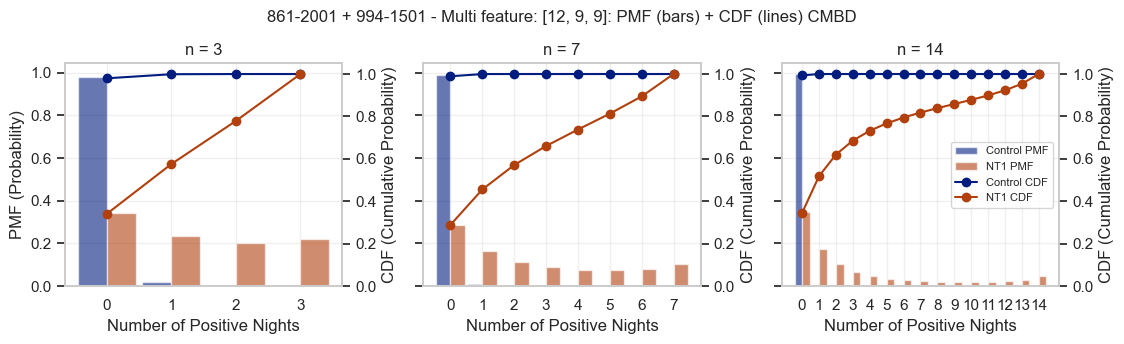

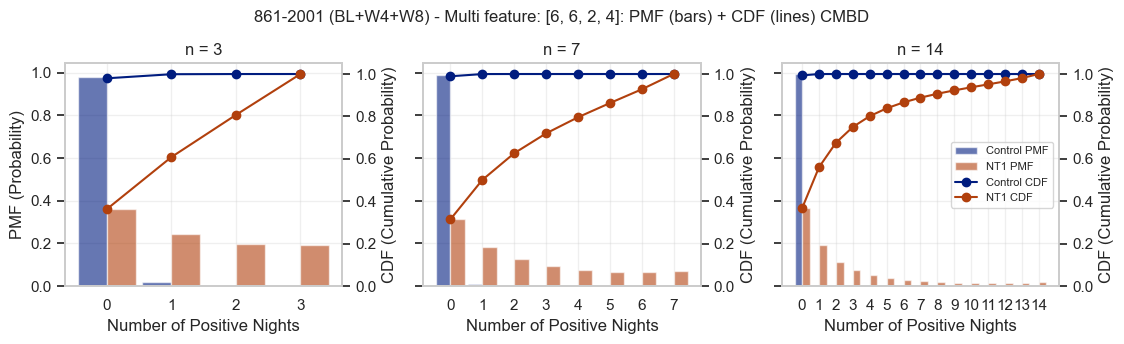

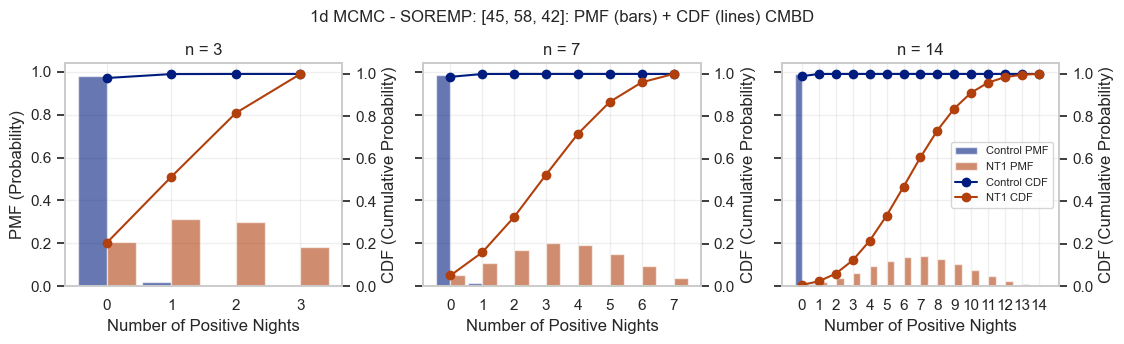

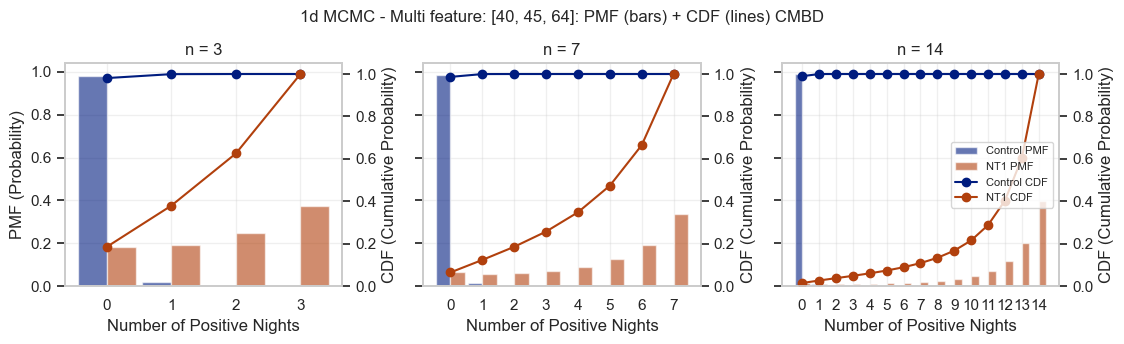

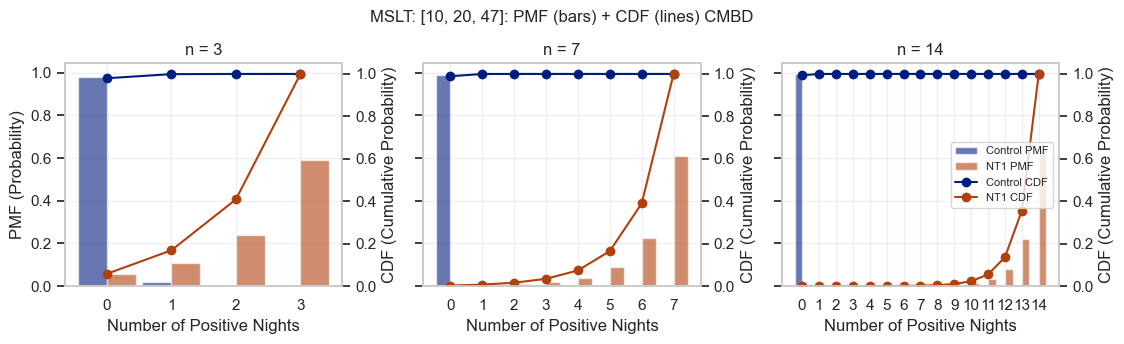

In [62]:

sns.set(style='whitegrid')

# -------------------- settings --------------------
# Choose which approaches to show and which n to compare:
n_values   = [3, 7, 14]  # change as you like

approaches = [

    {'name': '861-2001 + 994-1501 - SOREMP: [14, 11, 5]', 'Control': (0.0287, 0.1289), 'NT1': (0.3741, 0.3948)},
    {'name': '861-2001 + 994-1501 - Multi feature: [12, 9, 9]', 'Control': (0.0424, -0.7381), 'NT1': (0.4641, -0.2075)},
    
    {'name': '861-2001 (BL+W4+W8) - Multi feature: [6, 6, 2, 4]', 'Control': (0.0424, -0.7381), 'NT1': (0.4476, -0.1638)},
    
    {'name': '1d MCMC - SOREMP: [45, 58, 42]', 'Control': (0.02856839, -0.40111661), 'NT1': (0.4914, 0.4159)},
    {'name': '1d MCMC - Multi feature: [40, 45, 64]', 'Control': (0.02856839, -0.40111661), 'NT1': (0.5585, -0.1691)},
    
    {'name': 'MSLT: [10, 20, 47]', 'Control': (0.0424, -0.7381), 'NT1': (0.6843, -0.1163)}
]

def exact_pmf_cdf(dist, xs):
    """Return PMF and CDF arrays for the given COM-B distribution over xs."""
    pmf = np.array([dist.pmf(k) for k in xs], dtype=float)
    pmf = pmf / pmf.sum() # guard against tiny drift
    cdf = np.cumsum(pmf)
    return pmf, cdf

# Use a stable color palette for Control vs NT1
con_color, nt1_color = sns.color_palette("dark", 2)

for approach in approaches:

    # extract parameters
    name = approach['name']
    p_con, nu_con = approach["Control"]
    p_nt1,  nu_nt1  = approach["NT1"]

    # One figure per approach; columns = number of n values
    fig, axes = plt.subplots(1, len(n_values), figsize=(3.8*len(n_values), 3.6), sharey=True)
    if len(n_values) == 1:
        axes = [axes]  # make iterable if only one subplot

    for idx, n in enumerate(n_values):
        ax1 = axes[idx]
        x = np.arange(0, n+1)

        # Build COM-B distributions at m = n
        dist_con  = cmb.ConwayMaxwellBinomial(p_con,  nu_con,  n)
        dist_nt1  = cmb.ConwayMaxwellBinomial(p_nt1,  nu_nt1,  n)

        # Exact PMF/CDF
        pmf_con, cdf_con = exact_pmf_cdf(dist_con, x)
        pmf_nt1, cdf_nt1 = exact_pmf_cdf(dist_nt1, x)

        # ---- PMF as side-by-side bars (same left y-axis) ----
        width = 0.45
        ax1.bar(x - width/2, pmf_con, width=width, label='Control PMF', color=con_color, alpha=0.6)
        ax1.bar(x + width/2, pmf_nt1, width=width, label='NT1 PMF',     color=nt1_color, alpha=0.6)
        ax1.set_xlabel("Number of Positive Nights")
        if idx == 0:
            ax1.set_ylabel("PMF (Probability)")
        ax1.set_title(f"n = {n}")
        ax1.set_xticks(x)
        ax1.grid(True, alpha=0.3)

        # ---- CDF on a twin axis (right y-axis), lines with markers ----
        ax2 = ax1.twinx()
        line_con, = ax2.plot(x, cdf_con, color=con_color, linestyle='-', marker='o', label='Control CDF')
        line_nt1, = ax2.plot(x, cdf_nt1, color=nt1_color, linestyle='-', marker='o', label='NT1 CDF')
        ax2.set_ylabel("CDF (Cumulative Probability)")
        ax2.grid(False)
        ax2.set_ylim(0, 1.05)

        # Legend: only add once (on the last subplot)
        if idx == len(n_values) - 1:
            handles = [
                ax1.patches[0],  # one of the Control PMF bars
                ax1.patches[-1], # one of the NT1 PMF bars
                line_con,
                line_nt1
            ]
            labels = ['Control PMF', 'NT1 PMF', 'Control CDF', 'NT1 CDF']
            ax2.legend(handles, labels, loc='center right', fontsize=8)


    fig.suptitle(f"{name}: PMF (bars) + CDF (lines) CMBD", y=.95, fontsize=12)
    plt.tight_layout()
    plt.show()



Notes:
- Limitations of small data with few nights. 
    - Small flutuations in input data --> big impact on model.
    - Even MSLT data suggests too optimistic performance
        - this is due to extrapolating 2 night --> many nights
- Estimated value for controls (Multi-feature) seems waaaay too low!